In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
# load different datasets
dataset = pd.read_csv("plant_village_200_400-300-v2.csv")

In [3]:
dataset.head(5)

,Unnamed: 0,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy,y
0,0,119.366067,118.319275,103.903825,48.070860,48.037134,50.339527,264.201924,0.941736,0.152253,12.652815,0
1,1,122.482592,124.362167,101.811292,61.310487,50.438132,62.362811,159.993428,0.973077,0.162413,12.482000,0
2,2,125.227742,124.687817,113.053492,42.390085,30.267779,45.792355,200.344550,0.917251,0.111431,12.613318,0
3,3,129.109042,125.046258,116.448392,39.025616,30.957675,41.203792,233.008982,0.899207,0.106348,12.535649,0
4,4,132.382817,133.221500,126.631300,43.992753,40.061833,46.393864,230.706975,0.932627,0.125873,12.795247,0


In [4]:
dataset.shape

(7638, 12)

In [5]:
y = dataset['y'].values
y

array([ 0,  0,  0, ..., 37, 37, 37])

In [6]:

X = dataset.iloc[:, 1:-1]

In [7]:
X.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,119.366067,118.319275,103.903825,48.070860,48.037134,50.339527,264.201924,0.941736,0.152253,12.652815
1,122.482592,124.362167,101.811292,61.310487,50.438132,62.362811,159.993428,0.973077,0.162413,12.482000
2,125.227742,124.687817,113.053492,42.390085,30.267779,45.792355,200.344550,0.917251,0.111431,12.613318
3,129.109042,125.046258,116.448392,39.025616,30.957675,41.203792,233.008982,0.899207,0.106348,12.535649
4,132.382817,133.221500,126.631300,43.992753,40.061833,46.393864,230.706975,0.932627,0.125873,12.795247


In [8]:
X.shape

(7638, 10)

In [9]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [10]:
X_train.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
2623,119.242083,127.566633,109.721008,51.692426,42.507290,60.787596,474.317388,0.889038,0.098620,13.403972
3393,99.474192,114.494425,89.899033,112.303494,119.291372,105.905341,275.131382,0.912758,0.598855,6.812487
1710,152.285258,150.280558,102.742275,32.166152,23.141930,53.088082,102.359001,0.923405,0.170029,11.463878
4574,149.961225,156.622967,142.303308,60.549857,44.264181,55.695044,179.509206,0.964512,0.129169,12.112403
4482,139.971900,150.841742,134.205033,59.604317,43.095584,54.855301,238.613901,0.950398,0.107358,13.072662


In [11]:
X_train.shape

(5346, 10)

In [12]:
y_train[0:5]

array([13, 16,  8, 22, 22])

In [13]:
# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
X_train[0:2]

array([[ 0.04977932,  0.1493646 ,  0.1732209 ,  0.30012647,  0.1078845 ,
         0.69002582,  2.60212108, -1.38044987, -1.08640196,  1.25943407],
       [-0.90257142, -0.47959496, -0.76197244,  4.24646446,  4.73981002,
         3.97284211,  0.87561209, -0.79908857,  3.5570251 , -3.96580765]])

In [17]:
y_train[0:2]

array([13, 16])

In [18]:
# Applying SVM classifier model

In [27]:
from sklearn import svm

In [20]:
# for GPU:
# import cuml.svm as cuml_svm
# import dask_cuml.model_selection as dcv
# from sklearn.datasets import make_classification
# from dask_cuda import LocalCUDACluster
# from dask.distributed import Client

# # Generate some sample data
# X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# # Setup a Dask-CUDA cluster with the T4-GPU
# cluster = LocalCUDACluster()
# client = Client(cluster)

# # Create a cuML SVM model
# clf = cuml_svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
#                    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
#                    max_iter=-1, probability=False, random_state=None, shrinking=True,
#                    tol=0.001, verbose=False)

# # Fit the model with Dask-Cuml
# clf.fit(X, y)

# # Define the parameter grid for GridSearchCV with Dask-Cuml
# param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],
#     'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 1],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# # Create GridSearchCV with Dask-Cuml model
# grid_search = dcv.GridSearchCV(clf, param_grid, cv=5)

# # Fit the grid search to the data
# grid_search.fit(X, y)

# # Get the best parameters and best estimator
# best_params = grid_search.best_params_
# best_clf = grid_search.best_estimator_

# print("Best Parameters with Dask-Cuml:", best_params)
# print("Best Estimator with Dask-Cuml:", best_clf)

In [28]:
clf = svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)
clf.fit(X_train, y_train)

SVC(C=100.0, gamma=0.01)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn import metrics

In [31]:
metrics.accuracy_score(y_test, y_pred)

0.6679755671902269

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000,  2000, 5000, 7500, 10000, 20000, 100000],
    'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

In [33]:
best_params

{'C': 20000, 'gamma': 0.01, 'kernel': 'rbf'}

In [34]:
from sklearn import metrics

# Calculate the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        68
           1       0.83      0.92      0.87        62
           2       0.76      0.79      0.78        73
           3       0.45      0.51      0.48        59
           4       0.43      0.43      0.43        53
           5       0.74      0.75      0.74        67
           6       0.56      0.69      0.62        58
           7       0.84      0.78      0.81        73
           8       0.54      0.47      0.50        62
           9       0.65      0.71      0.68        58
          10       0.50      0.43      0.46        58
          11       0.93      0.98      0.96        57
          12       0.97      0.98      0.98        65
          13       0.59      0.59      0.59        56
          14       0.64      0.70      0.67        64
          15       0.72      0.72      0.72        64
          16       0.81      0.88      0.84        49
          17       0.94    

In [35]:
int(clf.predict(X_train[0:1]))

/tmp/ipykernel_61923/193658397.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(clf.predict(X_train[0:1]))


23

In [36]:
y_train[0:1]

array([13])

In [37]:
print(X_train.shape, y_train.shape)

(5346, 10) (5346,)


In [38]:
clf = svm.SVC(C=best_params['C'], cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma=best_params['gamma'], kernel=best_params['kernel'],
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)
clf.fit(X_train, y_train)

SVC(C=20000, gamma=0.01)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
metrics.accuracy_score(y_test, y_pred)

0.7242582897033158

In [ ]:
clf = svm.SVC(C=1000000, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma=best_params['gamma'], kernel=best_params['kernel'],
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)
clf.fit(X_train, y_train)

SVC(C=1000000, gamma=0.01)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7068062827225131

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create the Random Forest classifier
clf = RandomForestClassifier()

# Define the parameter distributions
param_dist = {
    # Number of trees in the forest
    'n_estimators': randint(50, 500),

    # Number of features to consider at every split
    'max_features': [None, 'sqrt'],

    # Maximum depth of the trees
    'max_depth': randint(5, 30),

    # Minimum number of samples required to split a node
    'min_samples_split': randint(2, 20),

    # Minimum number of samples required at each leaf node
    'min_samples_leaf': randint(1, 10)
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_clf = random_search.best_estimator_

In [25]:
from sklearn.metrics import accuracy_score

# Use the best classifier to make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5828970331588132


In [41]:
class_names = dataset.iloc[:, -1].unique()

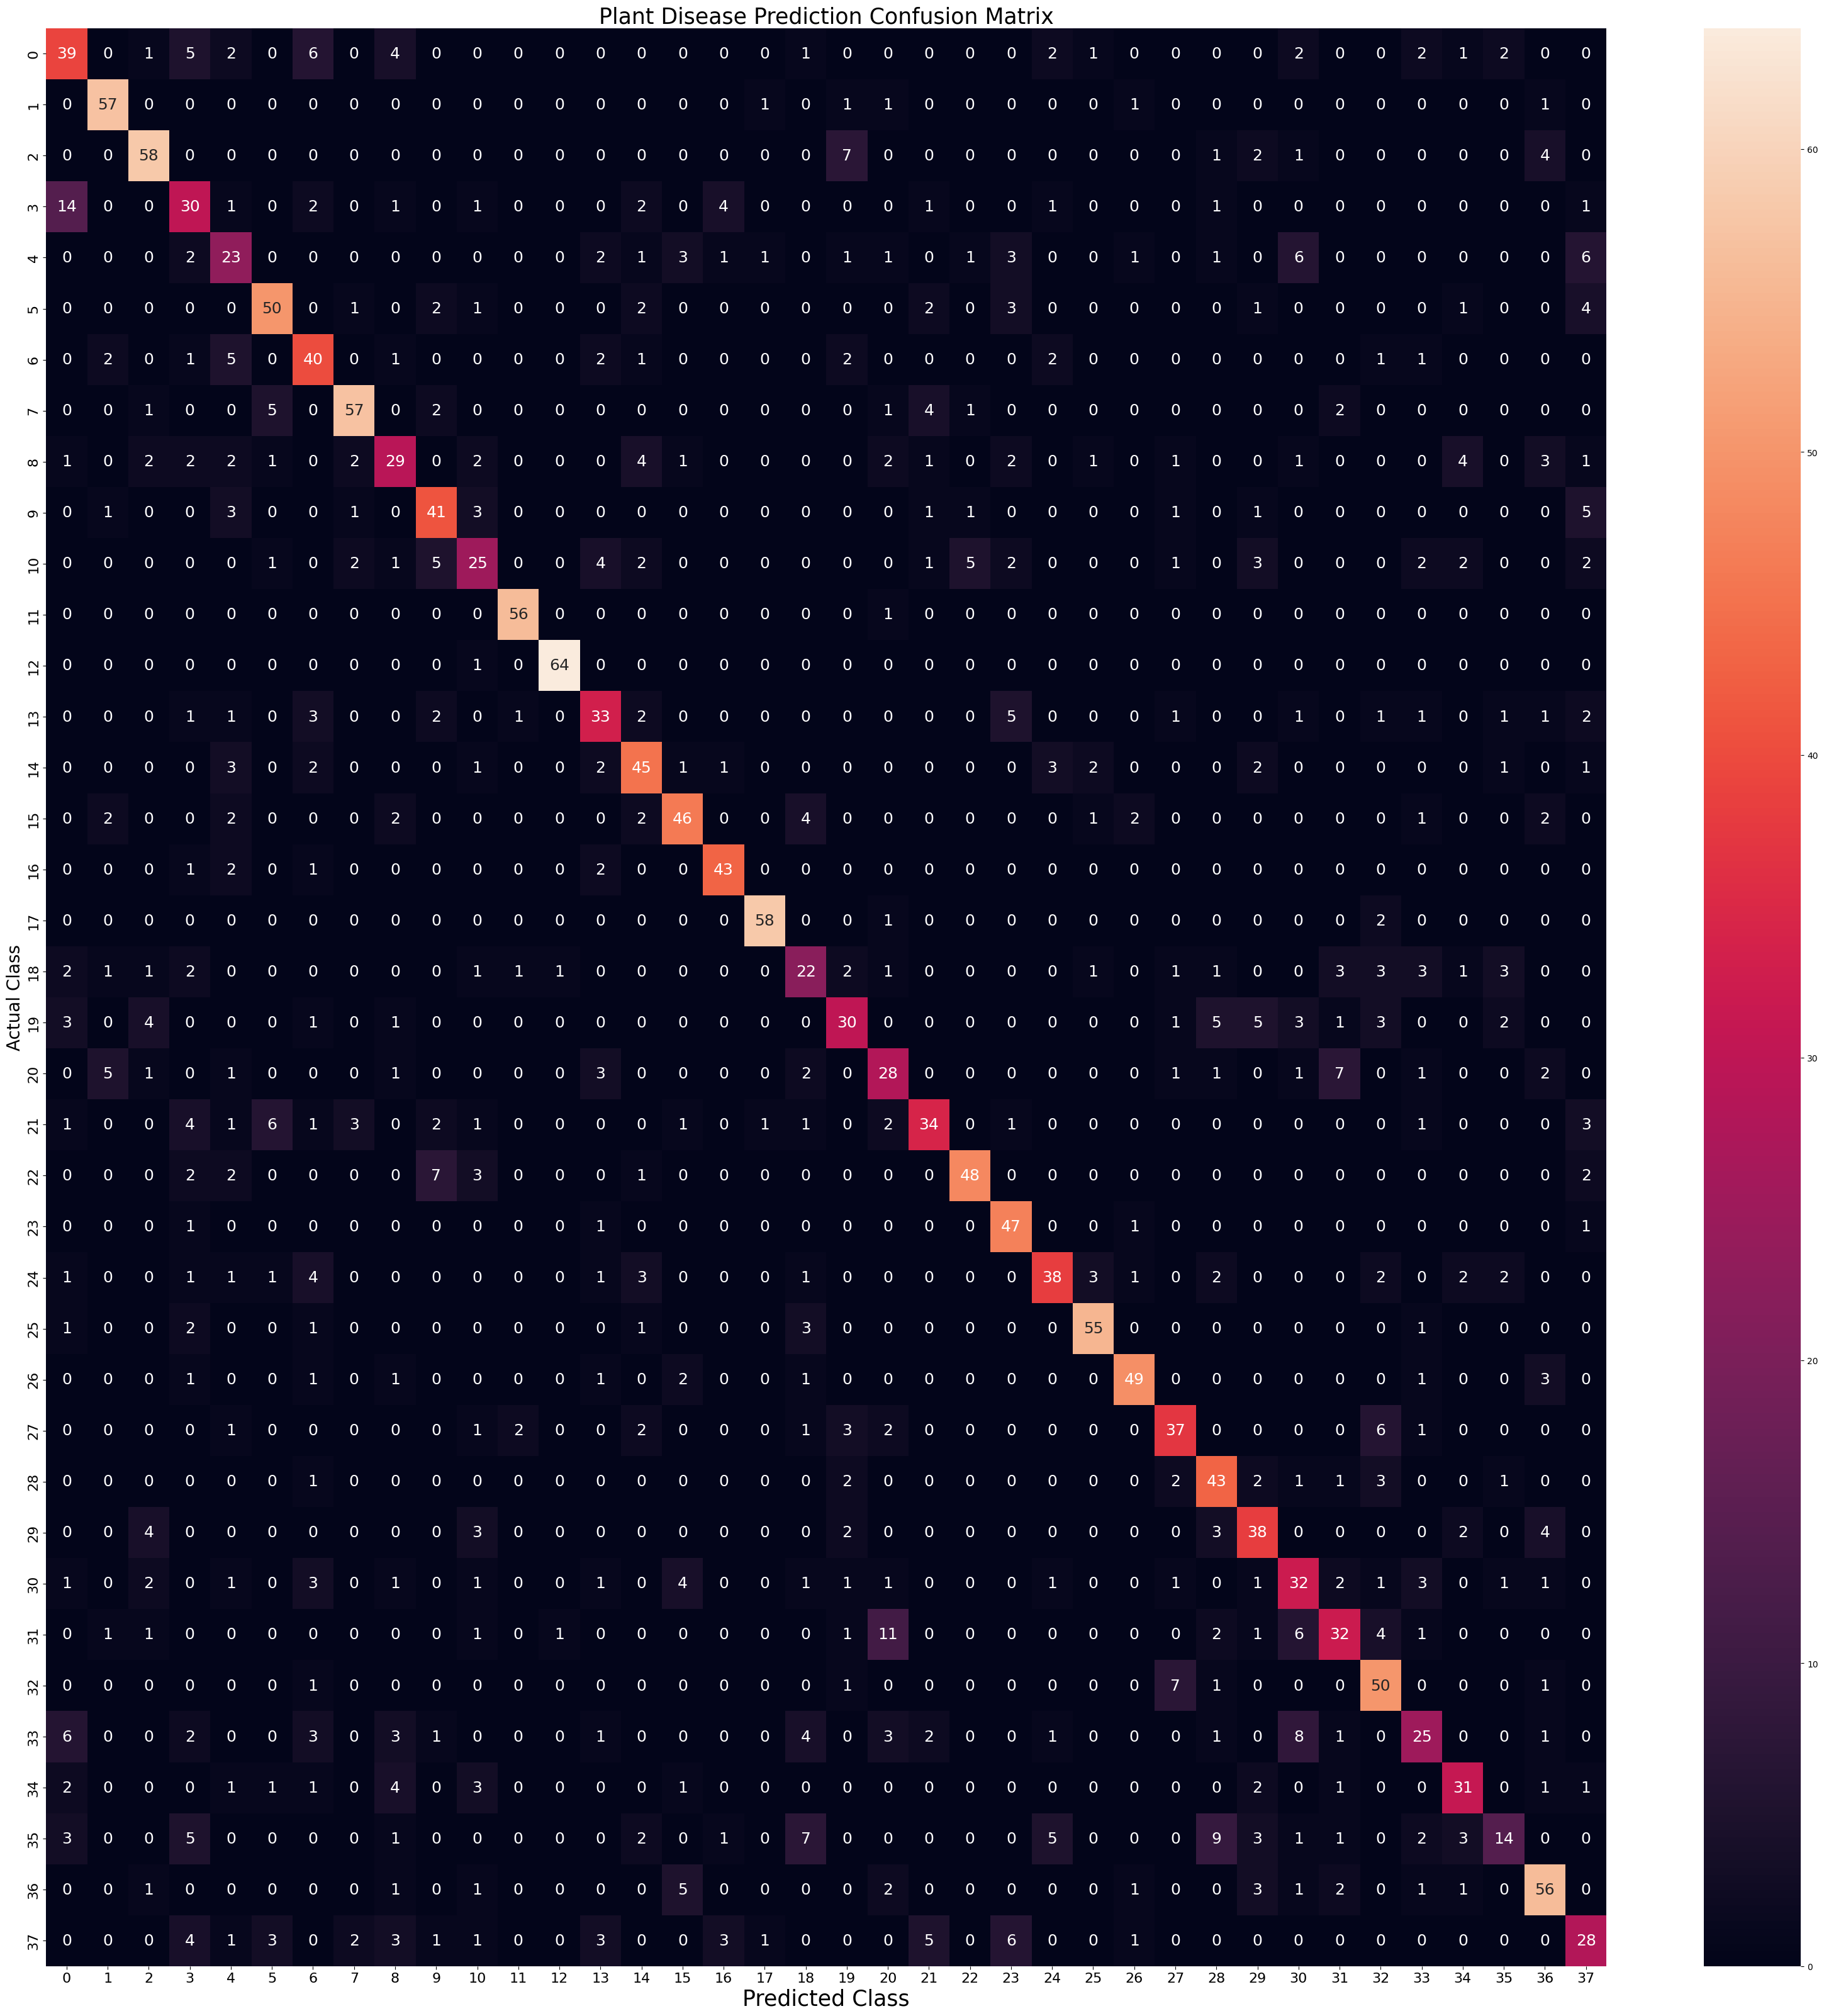

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 40))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 18},
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Class', fontsize=25)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()